# *__Assignment 9: Mushroom Stew__*

In [1]:
"""
import the necessary libraries
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
"""read in the mushroom data"""
shrooms = pd.read_table('agaricus-lepiota.data', delimiter=',', header=None)

In [3]:
"""rename columns for ease of use"""
colnames = [
    'poisonous', 'cap_shape', 'cap_surface', 'cap_color', 'bruised', 'odor',
    'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 
    'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
    'stalk_surface_below_ring', 'stalk_color_above_ring',
    'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
    'ring_type', 'spore_print_color', 'population', 'habitat'
]
shrooms.columns = colnames

## *_Exploratory Data Analysis_*

Nobody wants to die from eating mushroom stew. All poisonous msuhrooms should be dropped ftom the dataset.

In [4]:
"""drop poisonous mushrooms"""
shrooms = shrooms[shrooms['poisonous'] != 'p'].copy()
shrooms.shape

(4208, 23)

In [5]:
"""check for duplicate data"""
shrooms.duplicated().sum()

0

In [6]:
"""View dataset head"""
shrooms.head()

,poisonous,cap_shape,cap_surface,cap_color,bruised,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m


In [7]:
"""check data types"""
shrooms.dtypes

poisonous                   object
cap_shape                   object
cap_surface                 object
cap_color                   object
bruised                     object
odor                        object
gill_attachment             object
gill_spacing                object
gill_size                   object
gill_color                  object
stalk_shape                 object
stalk_root                  object
stalk_surface_above_ring    object
stalk_surface_below_ring    object
stalk_color_above_ring      object
stalk_color_below_ring      object
veil_type                   object
veil_color                  object
ring_number                 object
ring_type                   object
spore_print_color           object
population                  object
habitat                     object
dtype: object

Part of making an appealing dish is the color of the final product. The different cap colors of mushrooms in the data should be visualized so to give the chef an idea of what he has to work with.

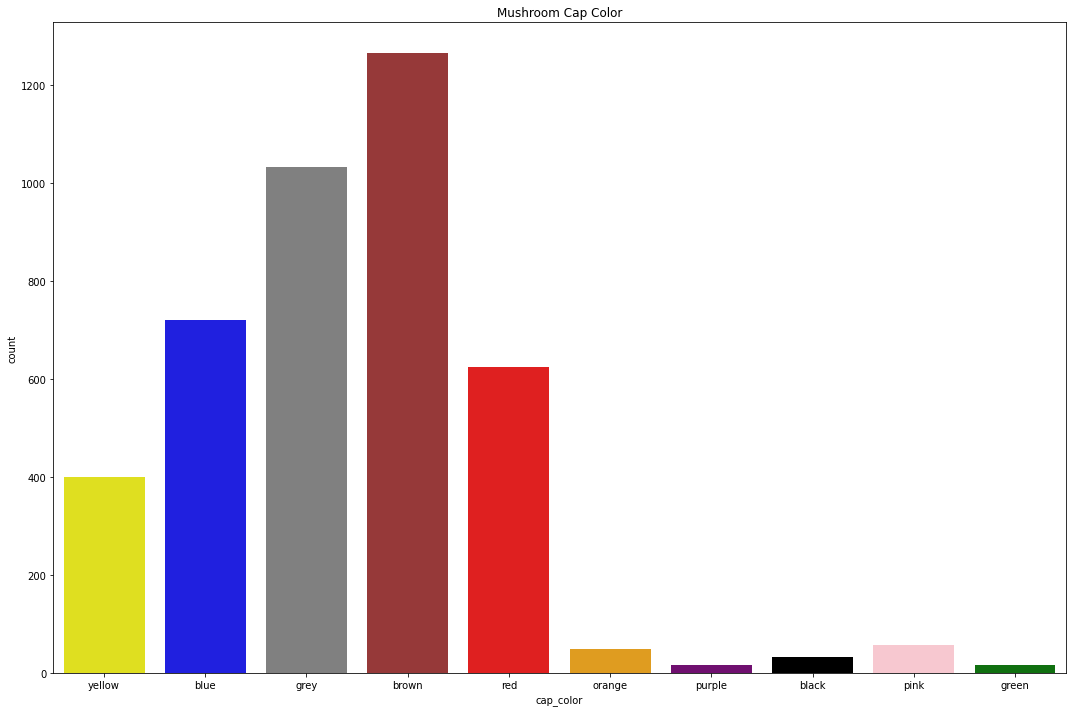

In [8]:
"""plot a count of different cap colors"""
color_dict = {'y': 'yellow', 'w':'blue', 'g':'grey','n':'brown','e':'red', 
              'b':'orange','u':'purple','c':'black','p':'pink','r':'green'}
fig, ax = plt.subplots(figsize=(15, 10))
count = sns.countplot(x='cap_color', data=shrooms, palette=color_dict)
ax.set_xticklabels(color_dict.values())
plt.title('Mushroom Cap Color')
plt.tight_layout()

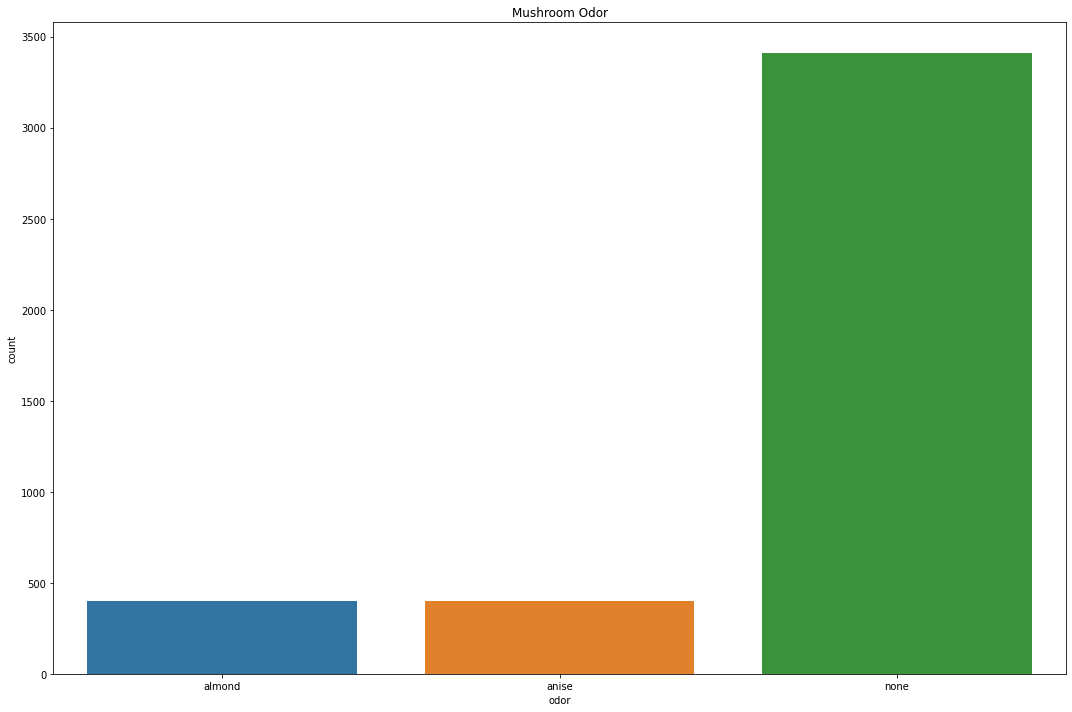

In [9]:
"""Plot a count of mushroom odor"""
fig, ax = plt.subplots(figsize=(15, 10))
count = sns.countplot(x='odor', data=shrooms)
ax.set_xticklabels(['almond', 'anise', 'none'])
plt.title('Mushroom Odor')
plt.tight_layout()